In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
params = {'legend.fontsize': 20,
          'figure.figsize': (8, 7),
          'axes.labelsize': 25,
          'axes.titlesize': 21,
          'xtick.labelsize': 23,
          'ytick.labelsize': 23,
          'image.cmap': 'jet',
          'lines.linewidth': 2,
          'lines.markersize': 7,
          'font.family': 'sans-serif'}


plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)
plt.close('all')

In [3]:
intensity_scan = np.linspace(0, 5e10, 25)
print(intensity_scan)

[0.00000000e+00 2.08333333e+09 4.16666667e+09 6.25000000e+09
 8.33333333e+09 1.04166667e+10 1.25000000e+10 1.45833333e+10
 1.66666667e+10 1.87500000e+10 2.08333333e+10 2.29166667e+10
 2.50000000e+10 2.70833333e+10 2.91666667e+10 3.12500000e+10
 3.33333333e+10 3.54166667e+10 3.75000000e+10 3.95833333e+10
 4.16666667e+10 4.37500000e+10 4.58333333e+10 4.79166667e+10
 5.00000000e+10]


### Load coherent tune data

In [4]:
path2data ='/afs/cern.ch/work/n/natriant/private/pyheadtail_example_crabcavity/'
study_name='sps_forCoherent_270GeV_NoNoise_WakesON_ayy6000_QpxQpy0_6D_initialOffsetY1e-4m_Intensity'

In [5]:
Qy_coherent ={}

for intensity in intensity_scan:
    try:
        Q_temp = pickle.load(open(f'{path2data}{study_name}{intensity/1e10:.2f}e10_fixedKicksSet0_run0/coherent_tunes.pkl', 'rb'))
    except OSError as err:
        Q_temp =[0.0]
        print("OS error: {0}".format(err))
    Qy_coherent[f'intensity {intensity/1e10:.2f}e10']= Q_temp['Qy']

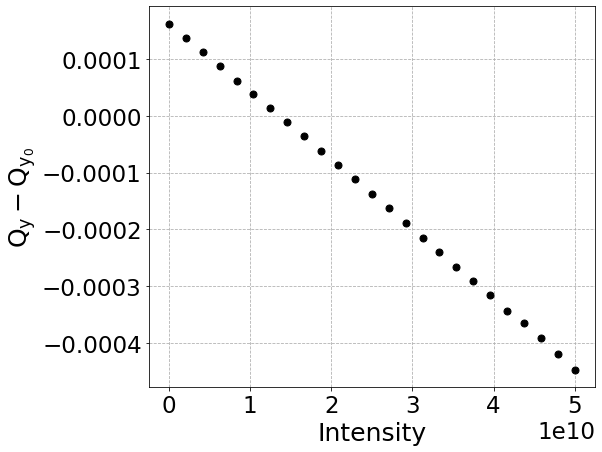

In [6]:
for intensity in intensity_scan:
    try:
        plt.plot(intensity, Qy_coherent[f'intensity {intensity/1e10:.2f}e10']-0.18, 'o',c='k')
    except OSError as err:
        print("OS error: {0}".format(err))

plt.xlabel('Intensity')
plt.ylabel(r'$\mathrm{Q_y-Q_{y_0}}$')
plt.grid(linestyle='dashed')

savefig=False
if savefig:
    plt.savefig(f'./output/tuneShift_with_Intensity_coherent{study_name}.png',  bbox_inches='tight')

### Load incoherent tune data

In [10]:
#path2data = '/afs/cern.ch/work/n/natriant/private/pyheadtail_example_crabcavity/sps_incoherentSpectrum_270GeV_noNoise_6D_wakesON_Qy0_ayy6000_intensity'
path2data = './'
Qy_incoherent={}

for i, intensity in enumerate(intensity_scan):
    try:
        Qy_dict[f'intensity {i}'] = pickle.load(open(f'{path2data}{study_name}{intensity/1e10:.2f}e10_fixedKicksSet0_run0/Qy_file.pkl', 'rb'))
    except OSError as err:
        Qy_dict[f'intensity {i}']=[0.0]
        print("OS error: {0}".format(err))

/home/natalia/anaconda3/envs/run_pyheadtail/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


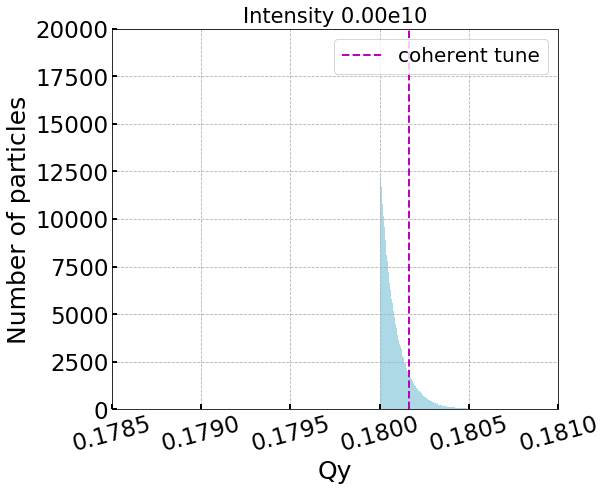

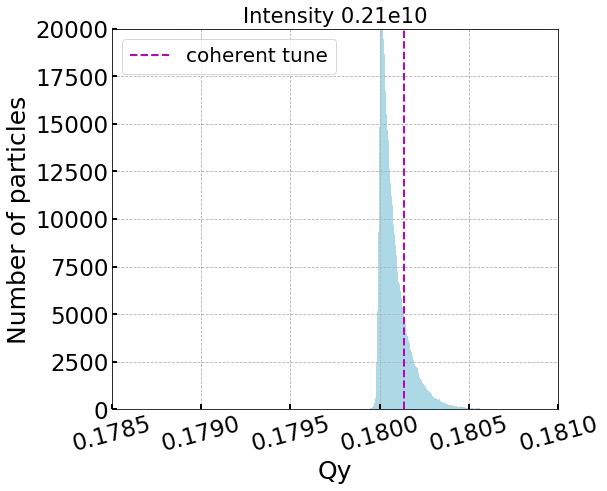

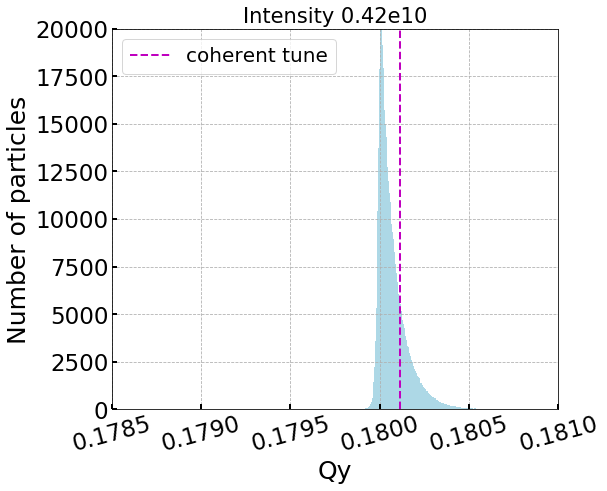

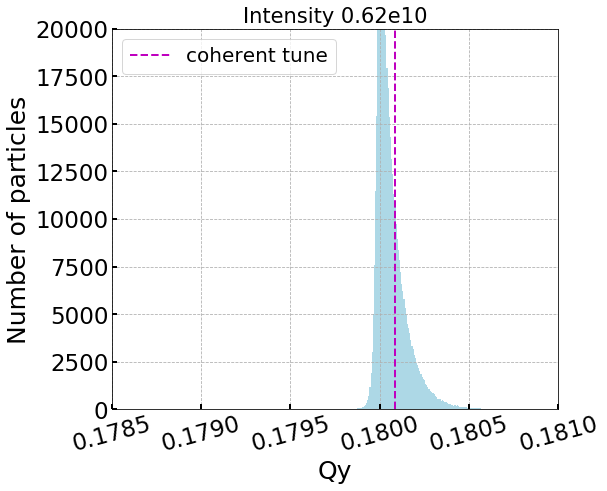

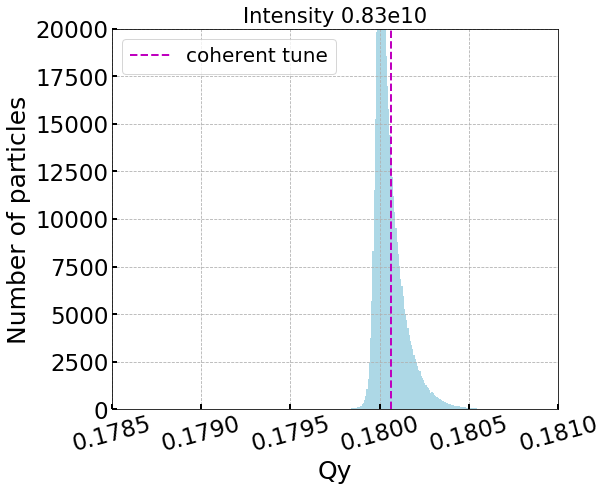

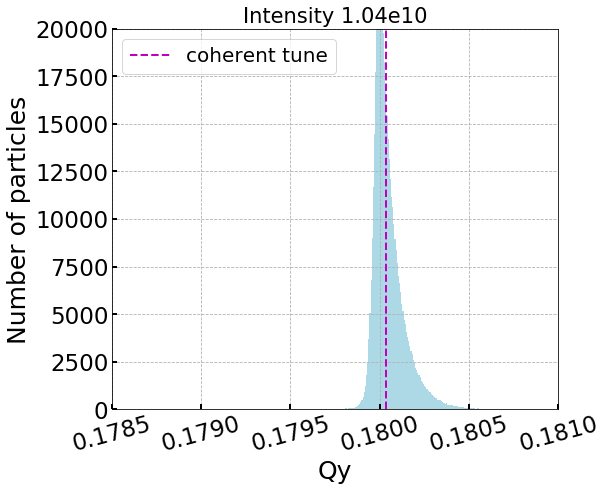

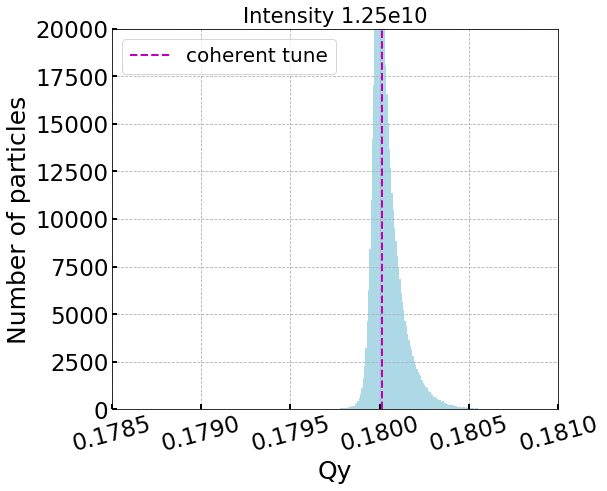

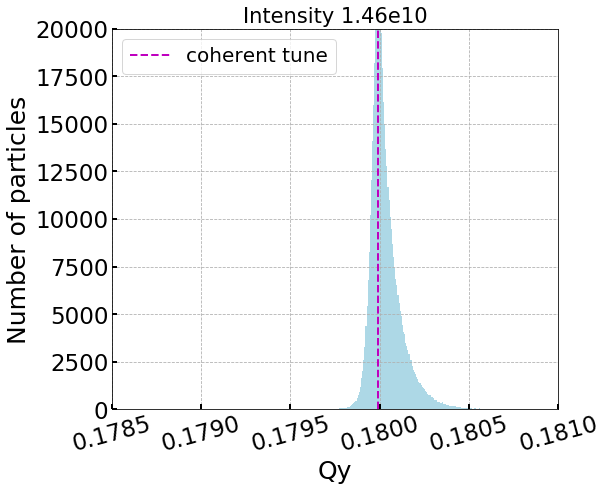

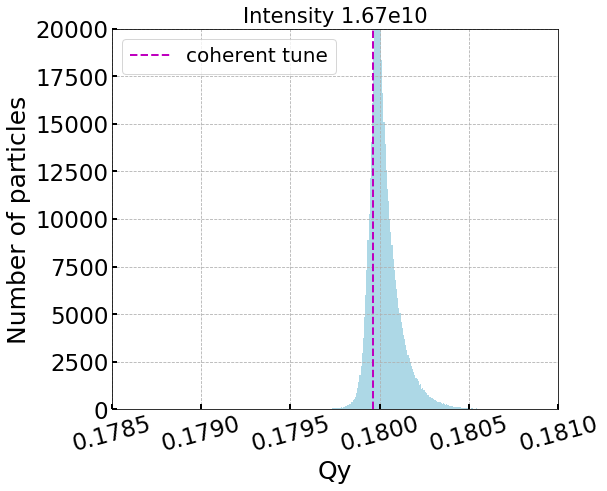

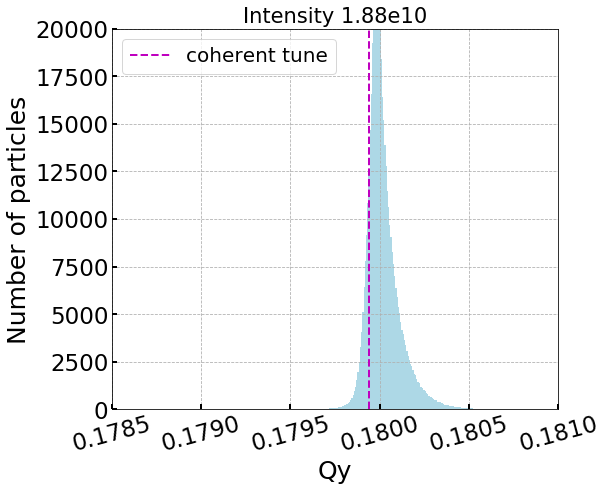

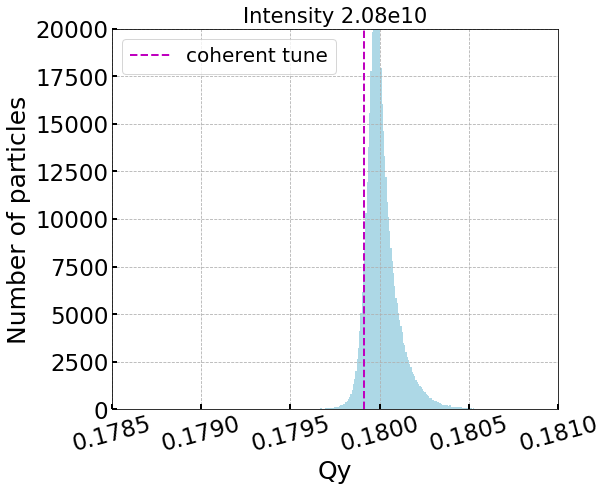

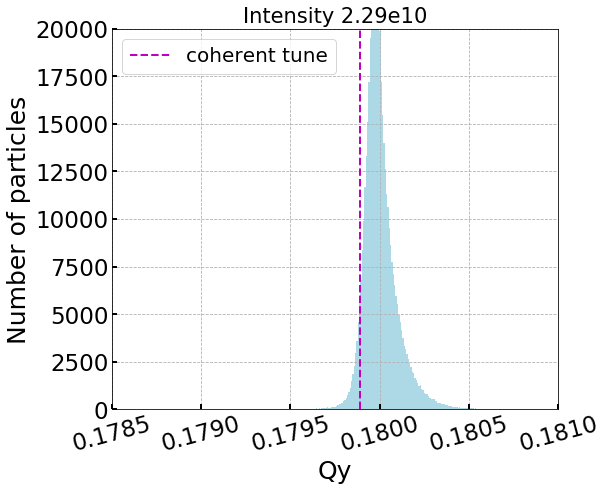

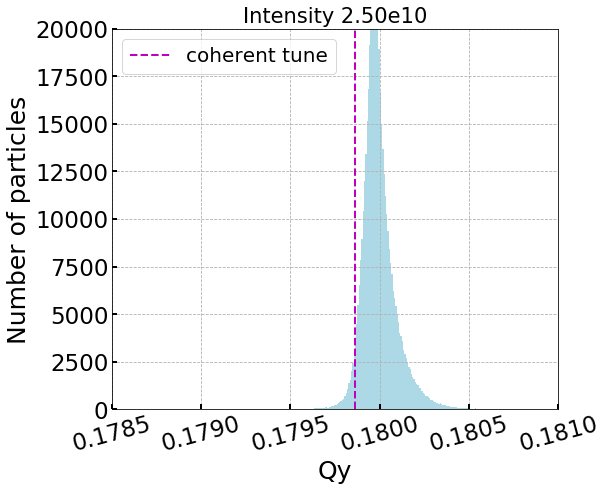

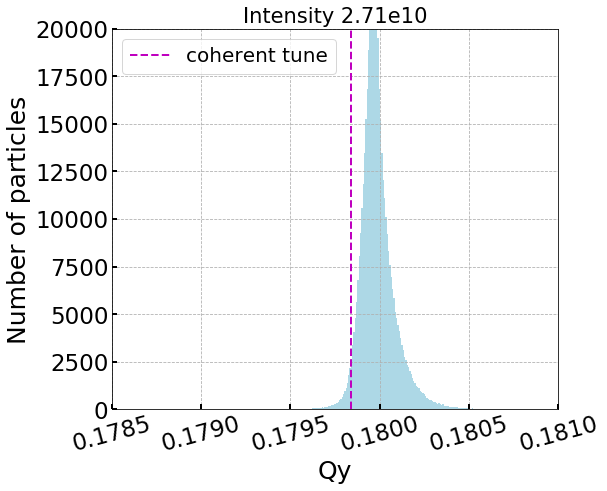

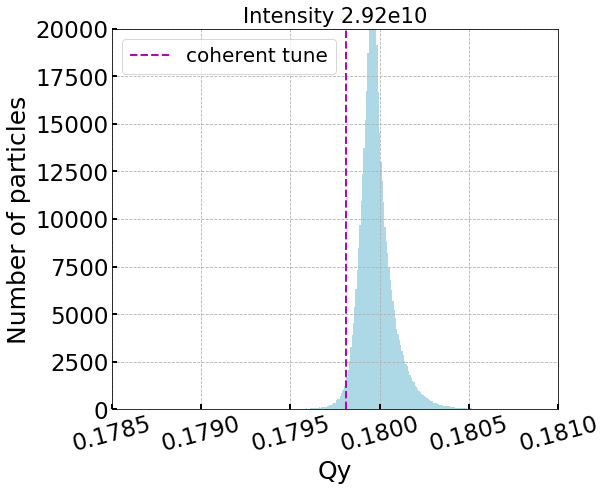

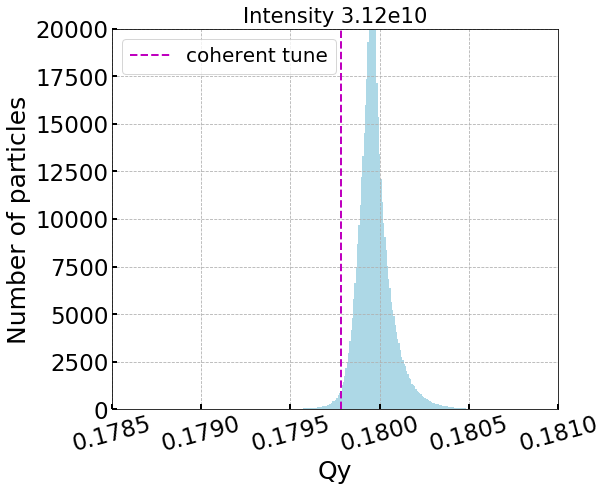

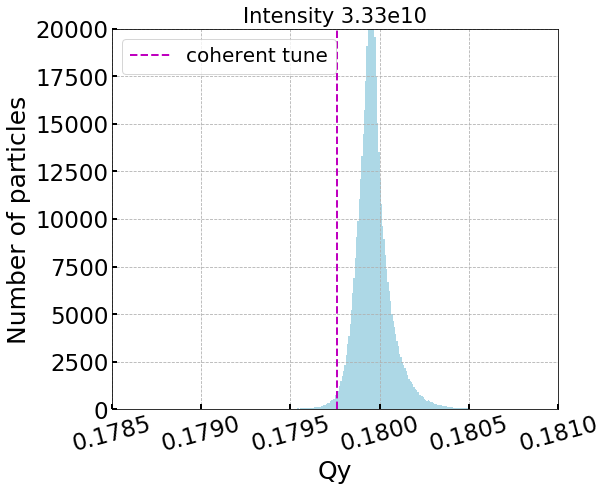

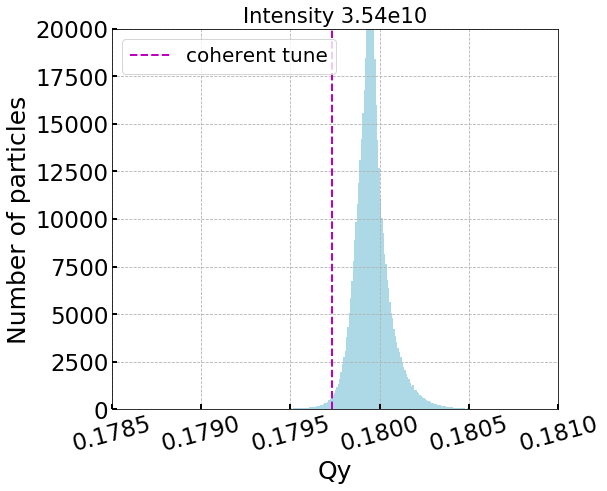

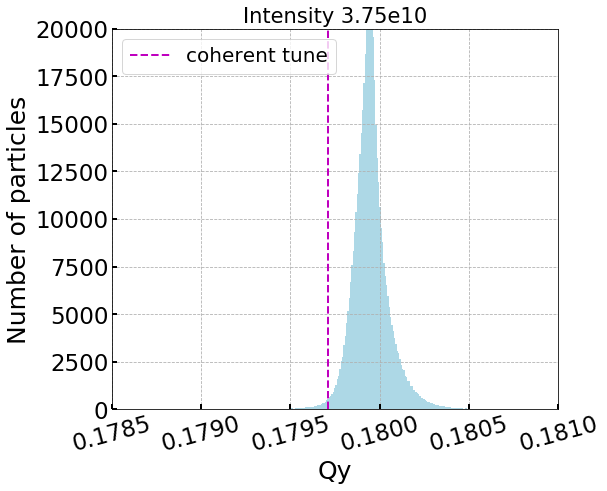

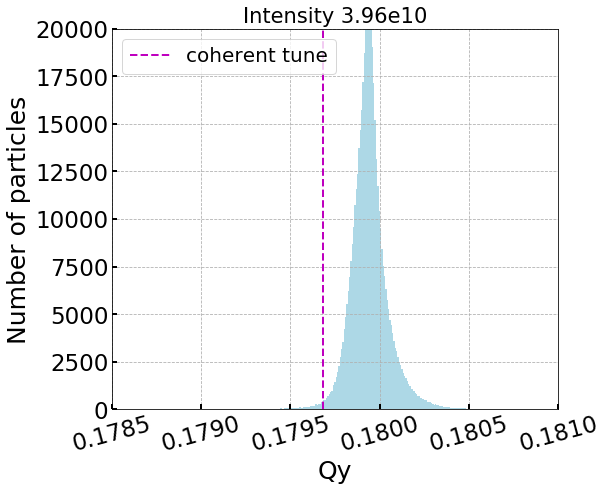

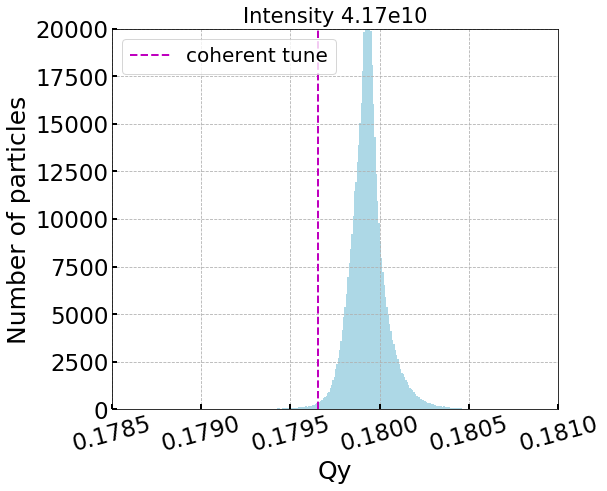

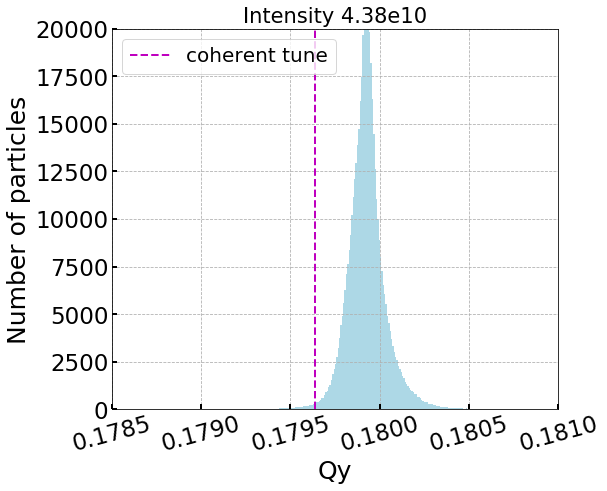

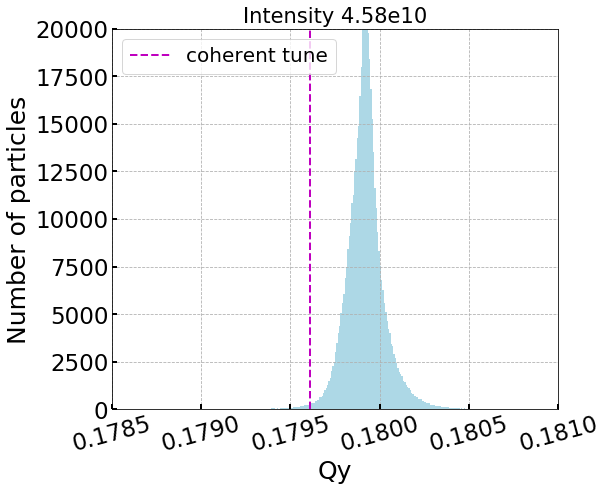

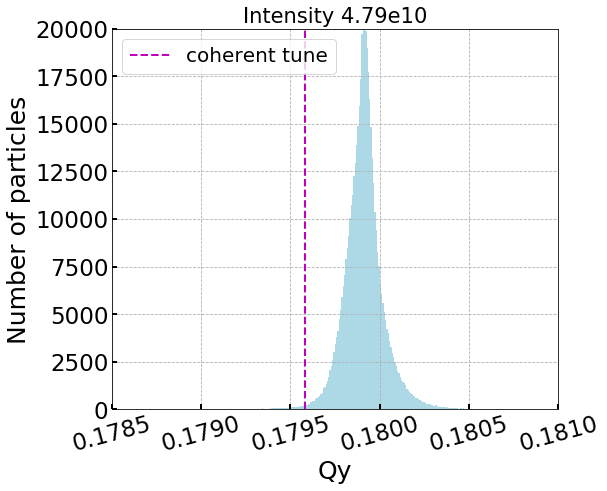

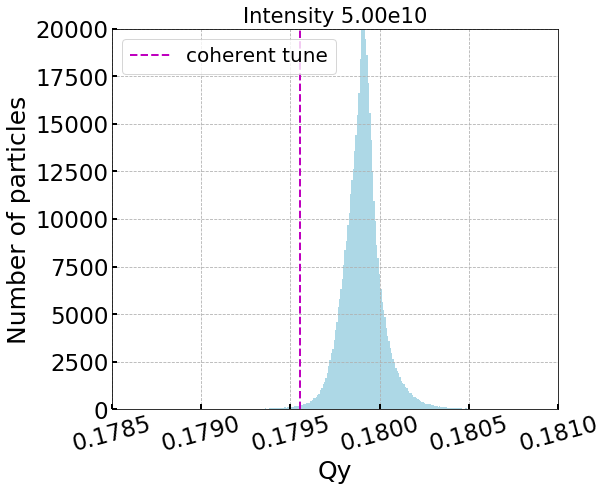

In [11]:
for i, intensity in enumerate(intensity_scan):

    fig, ax = plt.subplots()
    bins = 500

    try:
        h = ax.hist(Qy_dict[f'intensity {i}'], bins=bins, color='lightblue')#, cmin=cmin, cmap='Blues', vmin=vmin, vmax=vmax)#cmin=cmin, vmin=100)#, cmax=40000)


        #ax.scatter(Qx_coherent_wakes, Qy_coherent_wakes, c='m', zorder=50, label='coherent tune, wakes ON')
        ax.vlines(Qy_coherent[f'intensity {intensity/1e10:.2f}e10'], 0, 40000, color='m', linestyle='dashed', label='coherent tune')

        
    except OSError as err:
        print("OS error: {0}".format(err))

    ax.set_xlabel('Qy')
    ax.set_ylabel('Number of particles')


    plt.xticks(rotation=15)

    ax.tick_params(axis='both', which='both', direction='in', length=5, width=2)
    ax.set_xlim(0.1785, 0.181)
    ax.set_ylim(0, 20000) #33000

    ax.set_title(f'Intensity {intensity/1e10:.2f}e10')

    ax.grid(linestyle='dashed')
    ax.legend()


    savefig = False
    if savefig:
        plt.savefig(f'figures/SPS_coherent_incoherentTuneShift_1DHist_bins{bins}_intensity{intensity/1e10:.2f}e10.png', bbox_inches='tight')